In [1]:
# EDA 타이타닉 분석
# https://www.kaggle.com/c/titanic/data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# pip install missingno
import missingno as msno
#한글 처리
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

import warnings
warnings.filterwarnings(action="ignore")

df_train = pd.read_csv("train.csv")

df_train.info()

# 분석
# 컬럼 12개 , 수치형 7개 (연속형: 범주형:) , 비수치형 5개 의 컬럼으로 이루어져 있다.
# 행 819의 정보로 이루어져 있음
# 결측치 Age 와 Cabin(심각), Embarked 는 2개 결측치 있음

df_train.describe()   

df_train.head(10)
# 분석 컬럼정리

# 컬럼 내용을 확실하게 인지해야 함. 
# Survived - 생존유무, target 값. (0 = 사망, 1 = 생존)
# Name - 탑승객 성명
# Pclass - 티켓 클래스. (1 = 1st, 2 = 2nd, 3 = 3rd)
# Sex - 성별
# Age - 나이(세)
# SibSp - 함께 탑승한 형제자매, 배우자 수 총합
# Parch - 함께 탑승한 부모, 자녀 수 총합
# Embarked - 탑승 항구
# Fare - 탑승 요금
# Ticket - 티켓 넘버
# Cabin - 객실 넘버

# key feature
# 이를 기준으로 그래프를 그려낼 수 있기 때문에 중요.  -> EDA
# 가장 중요한 feature(칼럼은) Survived 컬럼이며, 해당 컬럼을 주심으로 분석이 필요해 보임
# 예) 성별 생존률, 나이대별 생존률 등등 ~~~

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# 2. 데이터 전처리 
# 결측치에 대한 처리를 반드시 해줘야 하기 때문에 데이터 전처리 과정 필요

df_train.isnull().sum()

# 분석
# Age            177
# Cabin          687
# 추후 분석 요건에 따라 결측치 처리 하기로 함
# Age 의 경우 데이터 삭제 또는 평균값으로 대체하는 것도 모호함


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

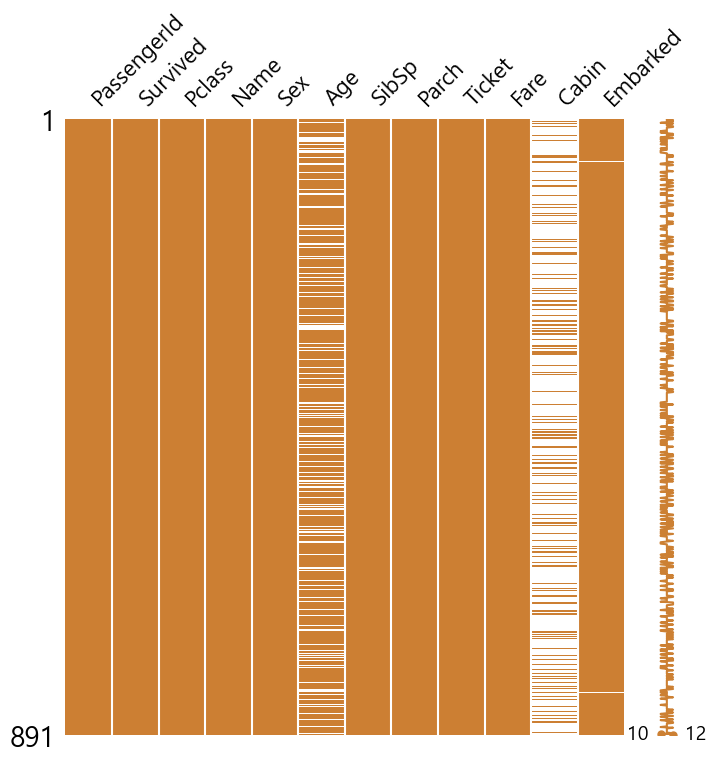

In [4]:
# 전처리를 위한 null 체크
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<Axes: >

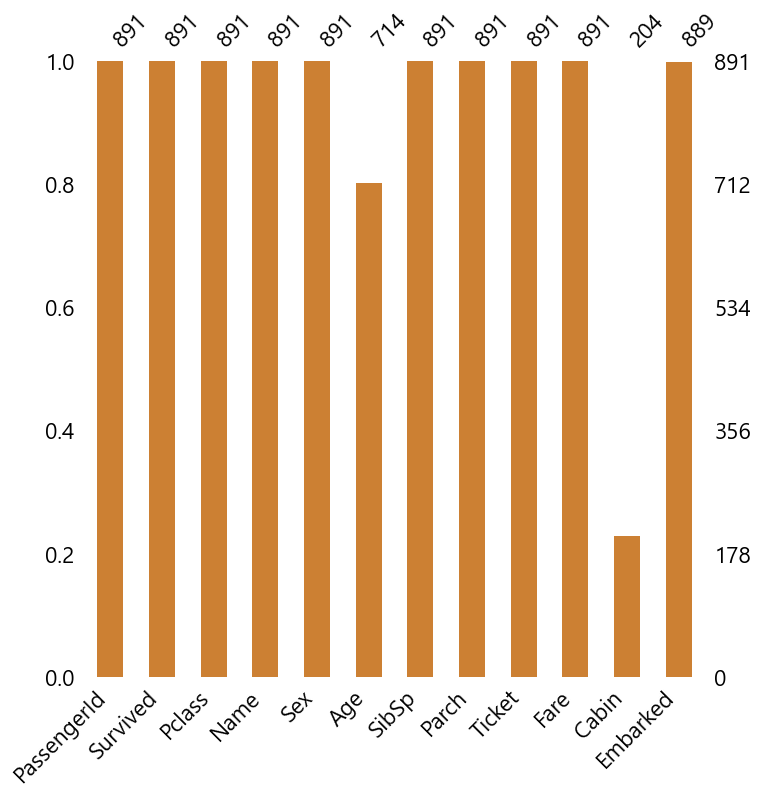

In [5]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<Axes: ylabel='count'>

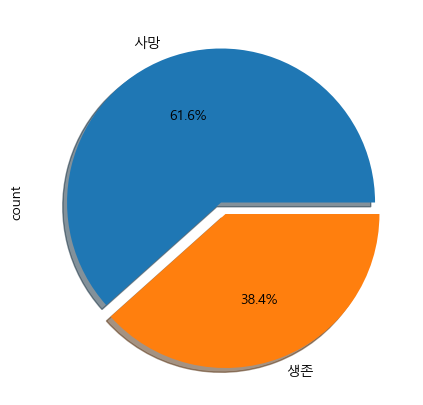

In [6]:
# 3. EDA 분석

# 1. 타겟 변수 (Survived) 분석
# 생존비율 확인
df_train["Survived"].value_counts()

plt.figure(figsize=(8,5))
labels = ['사망', '생존']

df_train["Survived"].value_counts().plot.pie(explode=[0,0.08], 
                                             shadow=True, 
                                             autopct='%1.1f%%',
                                             labels=labels) 

# 분석
# 사망 비율은 61.6%, 생존 비율은 38.4%로 사망한 탑승객의 수가 더 많은 것으로 확인된다. 
# 생존률은 38.4% 이다. 

# sns.countplot(x=df_train['Survived'], data=df_train)

        Survived
Sex             
female  0.742038
male    0.188908


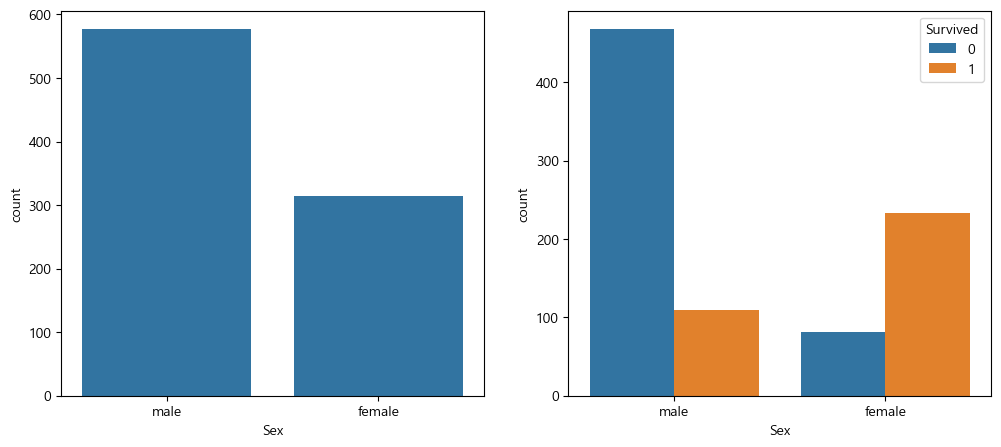

In [7]:
# feature 간 관계분석
# 성별과 생존관계

fig, axes = plt.subplots(1,2,figsize=(12,5))
sns.countplot(x="Sex", data=df_train, ax=axes[0])
sns.countplot(x="Sex", hue="Survived", data=df_train, ax=axes[1])

df_result = df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean()
print(df_result)

# 분석
# 남성의 탑승자 수가 더 많지만, 여성의 생존자 수가 더 많음을 알 수 있음
# 남녀 성별에 따른 생존률은 74%, 18% 이다. 


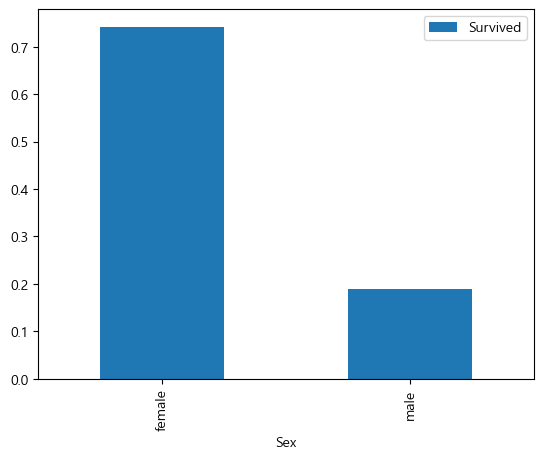

In [8]:
df_result = df_train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar()

# 분석
# 남성보다 여성을 먼저 구조한 것으로 보인다. 

<Axes: xlabel='Pclass', ylabel='count'>

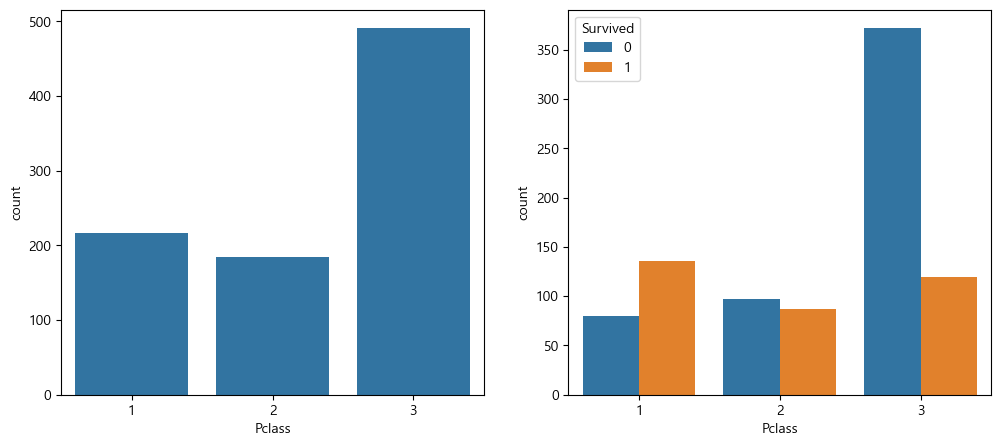

In [9]:
# 티켓 클라스(Pclass)
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.countplot(data=df_train, x="Pclass", ax=axes[0])
sns.countplot(data=df_train, hue="Survived", x="Pclass", ax=axes[1])

# 분석
# 3등석 탑승객이 가장 많이 탔고, 3등석 탑승객의 사망 인원수 또한 가장 많다


In [10]:
# 수치로 확인해보자

# 각 등급별 탑승객 수
df_result = df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()
print(df_result)

# 각 등급별 생존자수
df_result = df_train[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).sum()
print(df_result)

# class 그룹에서 Survived 값의 평균 = 이 평균은 생존률과 같음
rate_by_class = df_train.groupby("Pclass")["Survived"].mean() * 100
print(rate_by_class)

# 분석 결과 
# 클래스가 높을수록 생존확률이 높은 것을 확인할 수 있으며, 생존에 Pclass 가 큰 영향을 미친다고 생각해볼 수 있음
# 1등급 - 62.96, 2등급 - 47.28, 3등급 - 24.23 생존율을 보임

        Survived
Pclass          
1            216
2            184
3            491
        Survived
Pclass          
1            136
2             87
3            119
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


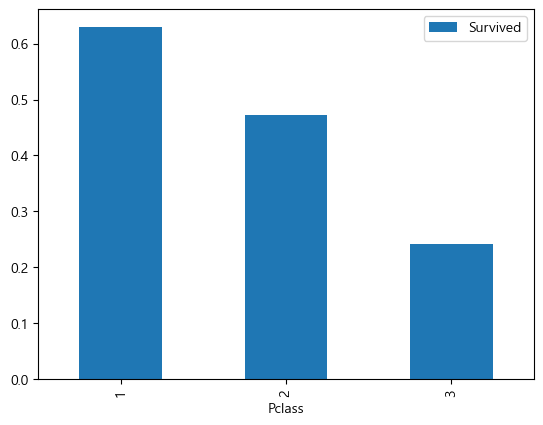

In [11]:
# 생존율 그래프 
df_result = df_train[["Pclass", "Survived"]].groupby(["Pclass"]).mean().plot.bar()

In [12]:
# 교차표(Contingency Table) 함수
# margins = True 행과 열과 합계를 추가
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [14]:
# 나이(Age)

df_train['Age'].describe()

# 분석
# 탑승객 평균나이: 29.7세
# 가장 높은 나이: 80세
# 가장 어린 나이: 0.4세

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Figure size 800x500 with 0 Axes>

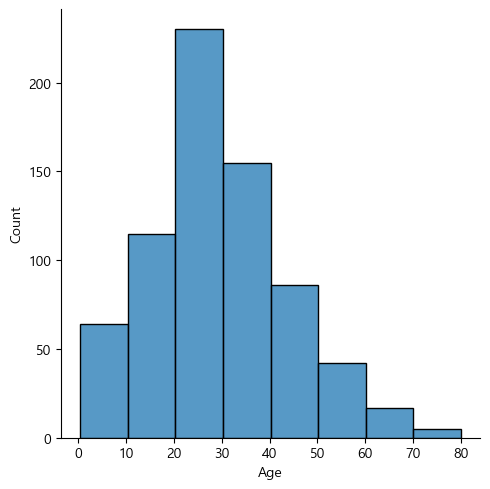

In [18]:
plt.figure(figsize=(8,5))
sns.displot(df_train['Age'], bins=8)

# 20 세에서 40세 나이대가 많이 탐


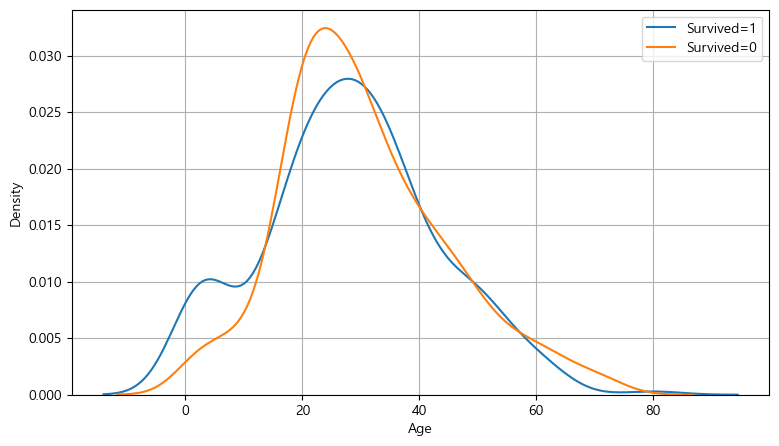

In [20]:
# 나이대별 생존률 그래프 확인

fig, ax = plt.subplots(1, 1, figsize=(9,5))

#kde는 Kernal Density Estimation을 의미
#샘플안에 없는 데이터를 추정하여 존재할 구간안에 그 값이 존재할 확률을 나타냄
#확률밀도함수라고 생각하면 됨
#kdeplot은 어떤 구간안의 확률을 나타내기 때문에
#전체구간에 대해서 적분을 해버리면 1이 나옴


sns.kdeplot(df_train[df_train["Survived"]==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train["Survived"]==0]['Age'], ax=ax)
plt.grid()
plt.legend(["Survived=1","Survived=0"])


Text(0.5, 0, 'Range of Age(0~80)')

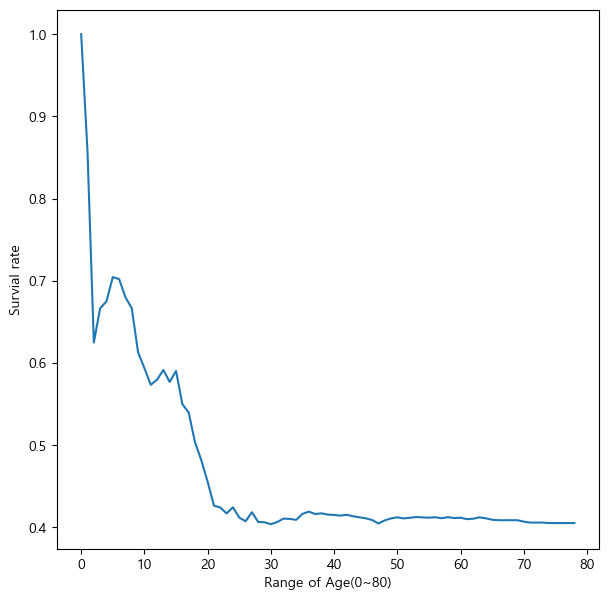

In [24]:
# 나이대가 변하면서 생존률이 어떻게 되는 확인
# 나이대를 점점 넓혀 가면서 생존률이 어떻게 되는 확인
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.ylabel("Survial rate")
plt.xlabel("Range of Age(0~80)")

# 분석
# 나이가 어릴수록 생존률이 높았음
# 어린이는 먼저 구했다고 볼 수 있음
# 20~30세의 생존률이 비교적 낮은 것으로 확인됨
# 나이 또한 생존률과 관계가 있음을 확인할 수 있음

<Axes: xlabel='Sex', ylabel='Age'>

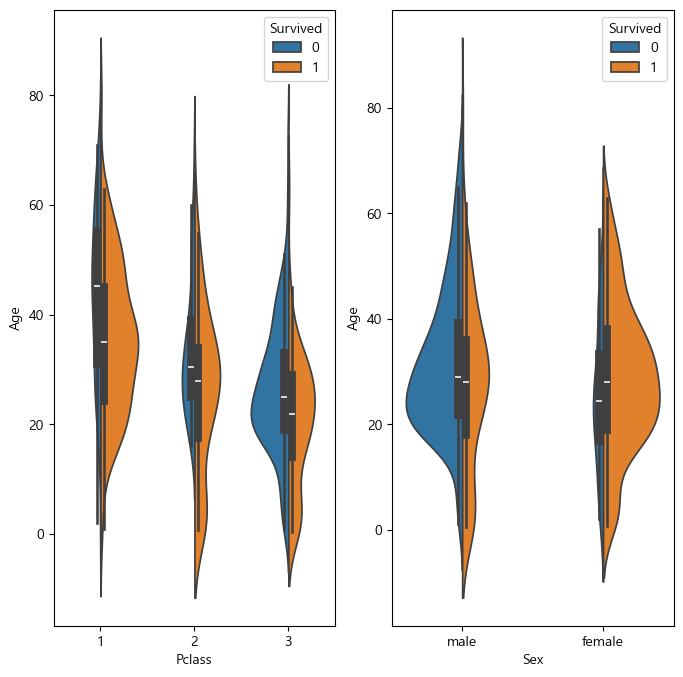

In [30]:
# 성별, 나이, 등급 모두에 대해서 그래프로 표현
# 바이올린의 특징은 분산을 알 수 있음
fig , ax = plt.subplots(1,2,figsize=(8,8))
sns.violinplot(x=df_train["Pclass"], y=df_train["Age"], hue="Survived",split=True, data=df_train,scale='count', ax=ax[0])
sns.violinplot(x=df_train["Sex"], y=df_train["Age"], hue="Survived",split=True, data=df_train,scale='count', ax=ax[1])

# 여성이 생존이 많았으며, 나이대도 젊은 나이대가 생존을 많이 함
# 모든 클래스에서 나이가 어릴수록 생존을 많이한 것을 알 수 있음
# 여성과 아이를 먼저 구한 것으로 결론을 내릴 수 있음
# 통계적 분석이 아니기 때문에 그래프에 대한 주관이 들어갈 수 있음
# 통계적 분석 vs EDA : EDA 는 주관적 견해 들어갈 수 있음

Text(0.5, 0, 'Range of Age(0~80)')

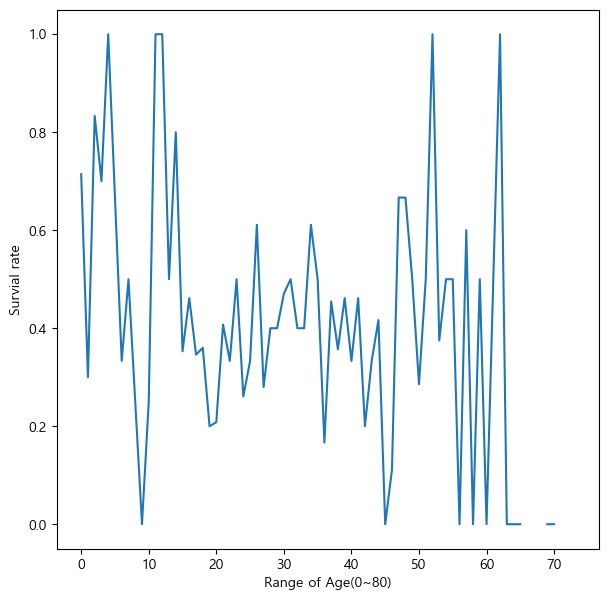

In [34]:
# 나이대가 변하면서 생존률이 어떻게 되는 확인
# 나이대를 점점 넓혀 가면서 생존률이 어떻게 되는 확인
cummulate_survival_ratio = []

cummulate_survival_ratio = []

for i in range(1, 80):
    subset = df_train[df_train['Age'] == i]  # 정확히 i세인 사람들만 선택
    
    if len(subset) == 0:
        cummulate_survival_ratio.append(None)  # 또는 np.nan
    else:
        survival_rate = subset['Survived'].mean()
        cummulate_survival_ratio.append(survival_rate)

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.ylabel("Survial rate")
plt.xlabel("Range of Age(0~80)")

# 분석
# 나이가 어릴수록 생존률이 높았음
# 어린이는 먼저 구했다고 볼 수 있음
# 20~30세의 생존률이 비교적 낮은 것으로 확인됨
# 나이 또한 생존률과 관계가 있음을 확인할 수 있음

<Axes: xlabel='Embarked'>

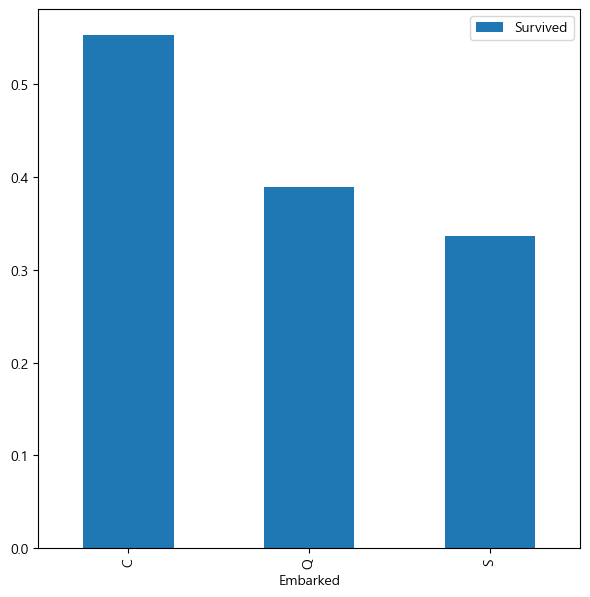

In [38]:
# Embarked 탑승한 항구
# 탑승한 항구에 따른 생존률
# fig, axes = plt.subplots(1, 2, figsize=(12, 5))
df_result = df_train[['Embarked','Survived']].groupby(["Embarked"], as_index=True).mean()
fig, ax = plt.subplots(1,1,figsize=(7,7))
df_result.sort_values(by='Survived',ascending=False).plot.bar(ax=ax)

# 분석
# C > Q > S 순으로 생존율이 높았다. 


<Axes: xlabel='Embarked', ylabel='count'>

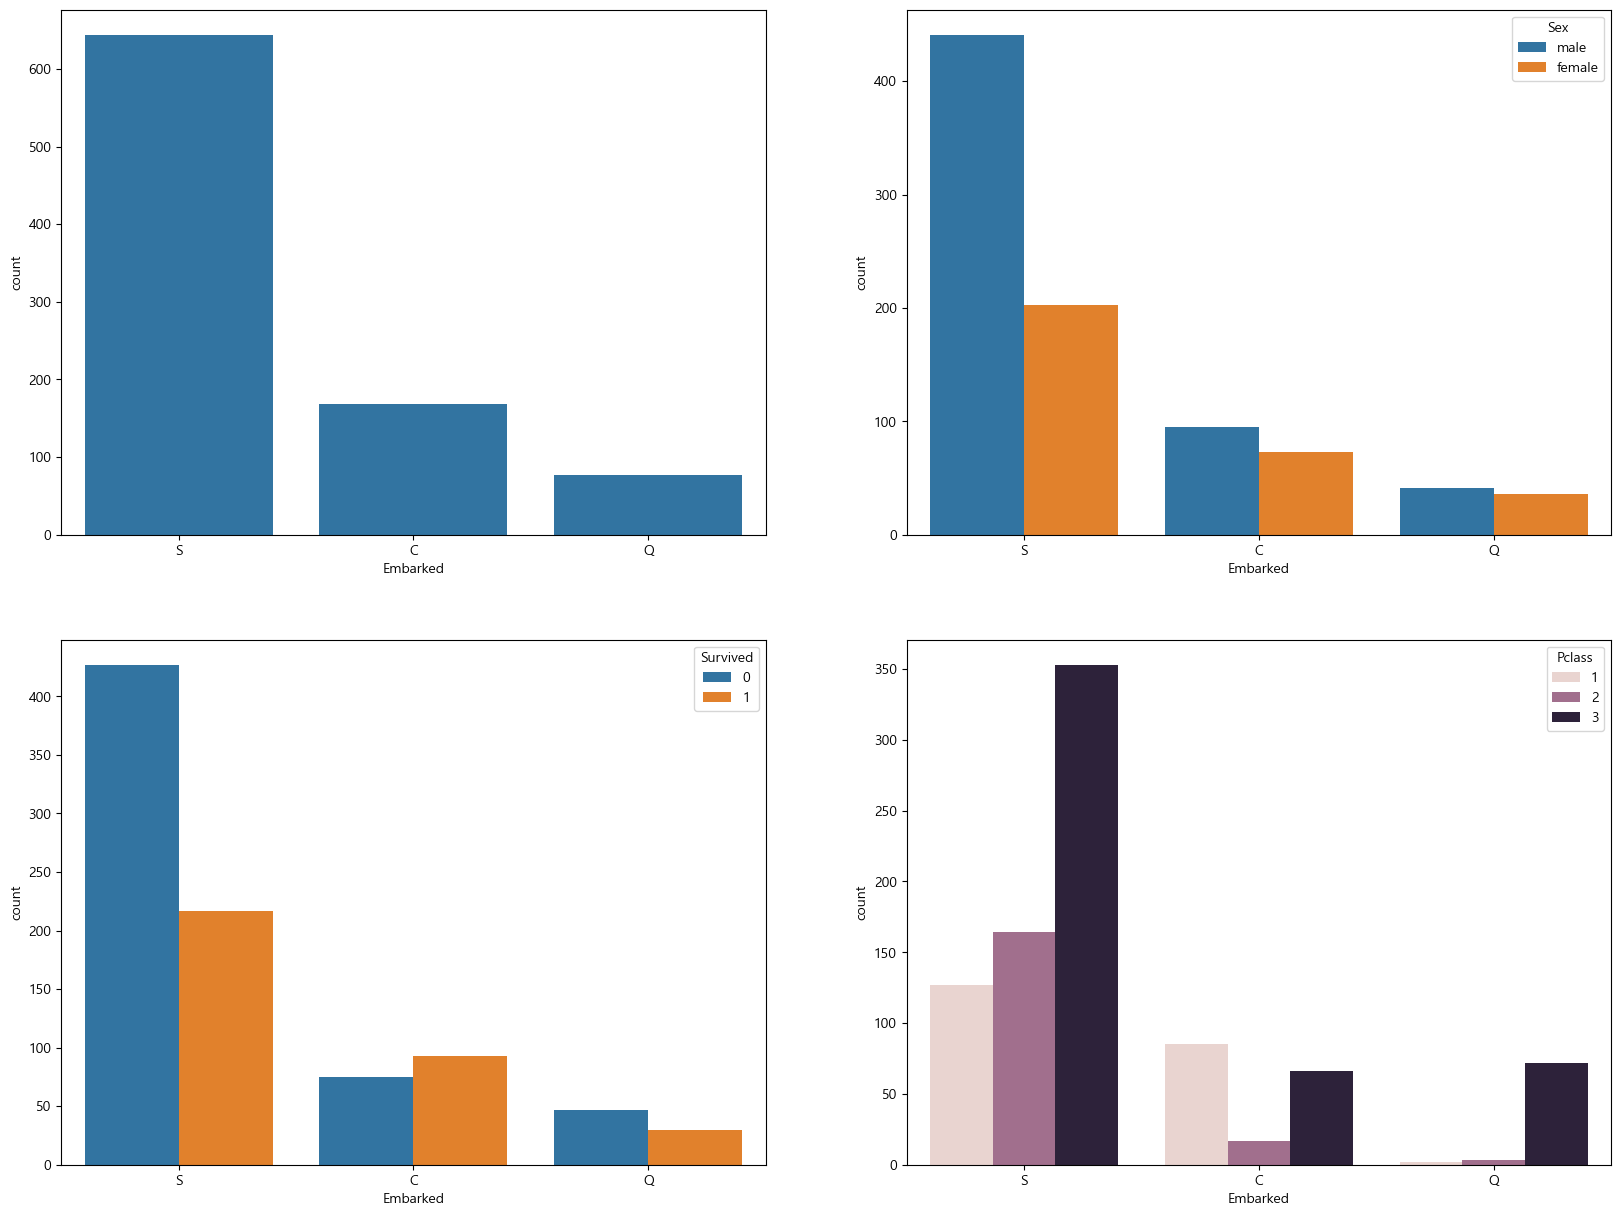

In [40]:
# 항구, 성별, 생존율

fig,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot(x=df_train['Embarked'], data=df_train, ax=ax[0,0])

sns.countplot(x=df_train['Embarked'], hue='Sex', data=df_train, ax=ax[0,1])
sns.countplot(x=df_train['Embarked'], hue='Survived', data=df_train, ax=ax[1,0])
sns.countplot(x=df_train['Embarked'], hue='Pclass', data=df_train, ax=ax[1,1])

 
# 분석
# C > Q > S 순으로 생존률이 높았다.
# 탑승객수는 S > C > Q 순이다.
# 남녀 비율은 모든 탑승지 에서 남성이 더 많이 타고 있지만, S가 압도적으로 많은 남성이 탑승했다.
# S에서 탑승한 사람들의 생존률이 낮은 것은, Pclass=3(3등급)이 많이  탑승했던 것과 관련이 깊어 보인다.
# C 탑승지에서 탑승한 승객은  Pclass = 1,2가 Pclass = 3보다 많이 있었다. 이는 C에서 탑승한 승객들의 생존률이 높은 것과 깊은 관련이 있어 보인다.
# 많은수의 Rich people(Pclass = 1)이 S에서 탑승했지만 생존율이 낮은 이유는 마찬가지로 Poor people(Pclass = 3)도 많이 탑승 했기 때문, Pclass = 3의 생존율은 19%였다.

# 질문
# 남성이 더 많이 사망한 이유가
# 여성을 더 많이 구조했기 때문인지 아니면 3 등급 Class 에 남성이 더 많이 탔기 때문인지?
# 데이터분석이기 때문에 데이터로 추론할 수 있는 내용으로 결론을 내야 하므로, 일단 3 등급 Class 에 남성이 더 많이 탔기 때문이라고 보는 것이 객관적임. 

In [45]:
# 형제 자매
# SibSp 와 Parch 를 합치면 family 가 됨
# family 로 분석 

df_train['family'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야 하니 +1

df_train
df_train['family'].describe()

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: family, dtype: float64

In [47]:
# 가족 수에 따른 생존율 수치 확인
df_train[['family', 'Survived']].groupby(['family'], as_index=True).mean()

,Survived
family,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


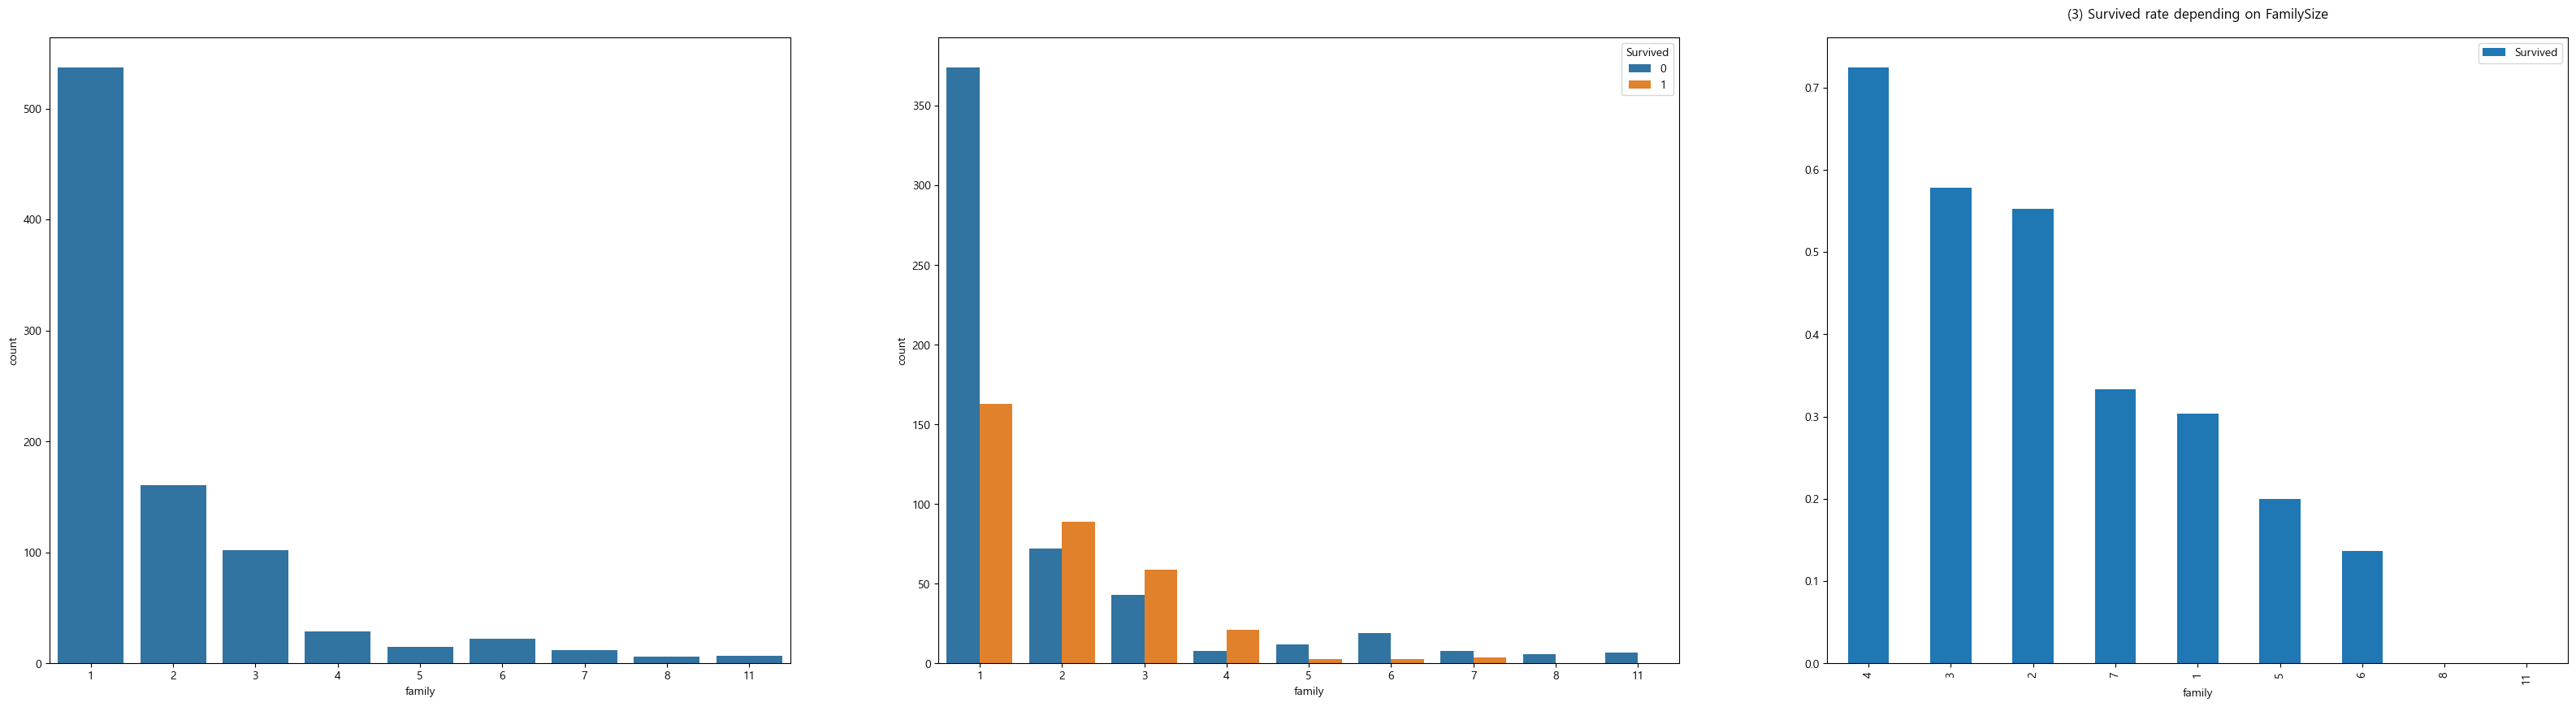

In [ ]:
fig,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot(x=df_train['family'], data=df_train, ax=ax[0])

sns.countplot(x=df_train['family'], hue="Survived", data=df_train, ax=ax[1])

df_train[['family', 'Survived']].groupby(['family'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# 분석
# 1인 탑승객이 500명이 넘는다. 가장 많은 가족 수는 11명이다. 
# 1인 탑승객의 생존율이 그다지 높지 않다. 0.30
# 대가족 (5-11) 의 경우 가족이 많을수록 생존이 떨어지는 것을 확인할 수 있다. 
# 특이하게 4인 가족의 경우 생존율이 70%가 넘는다. 
# 2인 3인 4인 가족의 경우 사망률보다 생존율이 더 높다. 